In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

In [13]:
# 데이터 로드
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# 데이터 스케일링
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# 모델 생성 및 하이퍼파라미터 설정
input_dim = X.shape[1]
output_dim =1
learning_rate = 0.1
num_epochs = 1000

In [21]:
# 다양한 옵티마이저 설정
optimizers = OrderedDict()
optimizers["SGD"] = optim.SGD
optimizers["Momentum"] = optim.SGD
optimizers["Adagrad"] = optim.Adagrad
optimizers["RMSprop"] = optim.RMSprop
optimizers["Adam"] =  optim.Adam

SGD Test Loss: 545.8548
Momentum Test Loss: 530.3439
Adagrad Test Loss: 537.4223
RMSprop Test Loss: 537.6606
Adam Test Loss: 532.6815


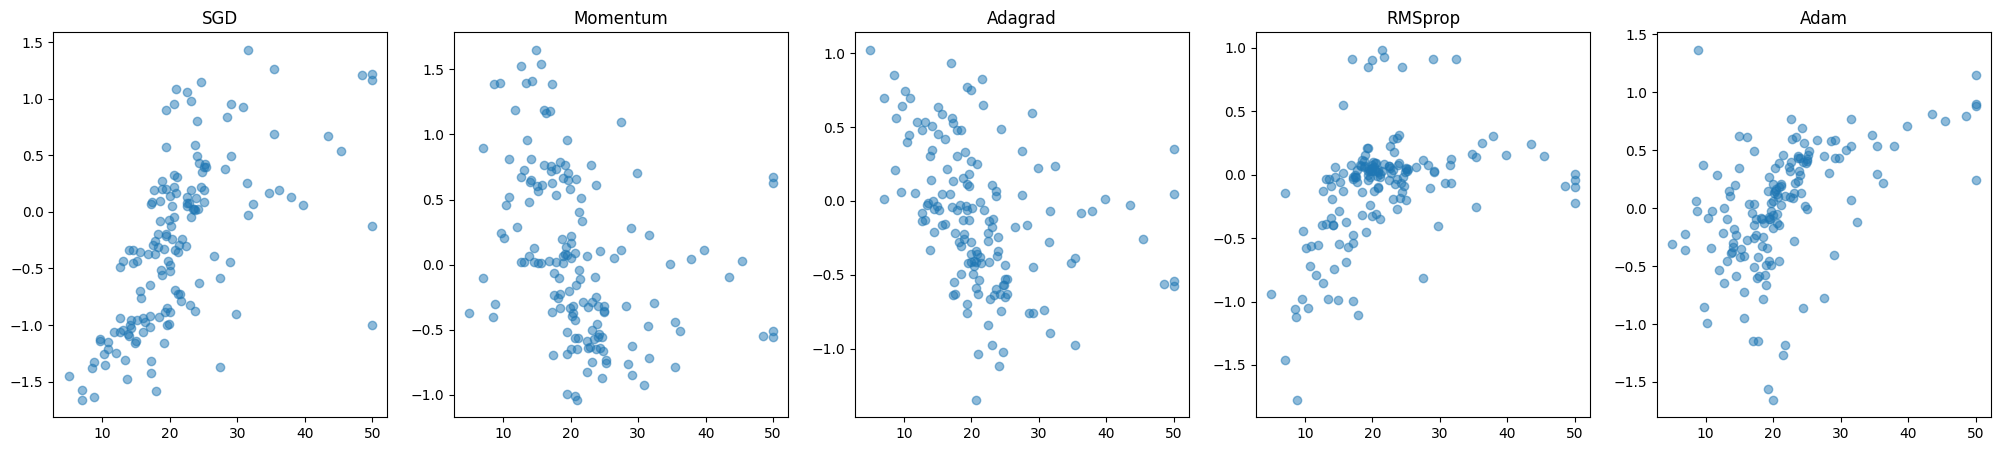

In [22]:
# 모델 학습 전 분포 확인
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
    # 모델
    model = nn.Linear(input_dim, output_dim)

    if optimizer_name == "Momentum":
        opt = optimizer(model.parameters(), lr=learning_rate, momentum=0.9)
    else:
        opt = optimizer(model.parameters(), lr=learning_rate)

    # 모델 예측 및 평가
    criterion = nn.MSELoss()
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32)
        labels = torch.tensor(y_test, dtype=torch.float32)
        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        print(f"{optimizer_name} Test Loss: {test_loss.item():.4f}")
        preds = outputs.numpy()

    # 그래프 출력
    axs[i].scatter(y_test, preds, alpha=0.5)
    # axs[i].plot(y_test, y_test, color='red')
    axs[i].set_title(optimizer_name)

plt.show()

c:\anaconda3\envs\std\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([354])) that is different to the input size (torch.Size([354, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


SGD - Epoch [100/1000], Loss: 87.8966
SGD - Epoch [200/1000], Loss: 87.8965
SGD - Epoch [300/1000], Loss: 87.8965
SGD - Epoch [400/1000], Loss: 87.8965
SGD - Epoch [500/1000], Loss: 87.8965
SGD - Epoch [600/1000], Loss: 87.8965
SGD - Epoch [700/1000], Loss: 87.8965
SGD - Epoch [800/1000], Loss: 87.8965
SGD - Epoch [900/1000], Loss: 87.8965
SGD - Epoch [1000/1000], Loss: 87.8965
SGD Test Loss: 77.0985
Momentum - Epoch [100/1000], Loss: 87.9019
Momentum - Epoch [200/1000], Loss: 87.8965
Momentum - Epoch [300/1000], Loss: 87.8965
Momentum - Epoch [400/1000], Loss: 87.8965
Momentum - Epoch [500/1000], Loss: 87.8965
Momentum - Epoch [600/1000], Loss: 87.8965
Momentum - Epoch [700/1000], Loss: 87.8965
Momentum - Epoch [800/1000], Loss: 87.8965
Momentum - Epoch [900/1000], Loss: 87.8965
Momentum - Epoch [1000/1000], Loss: 87.8965
Momentum Test Loss: 77.0985
Adagrad - Epoch [100/1000], Loss: 522.2966
Adagrad - Epoch [200/1000], Loss: 489.6833
Adagrad - Epoch [300/1000], Loss: 465.9325
Adagrad 

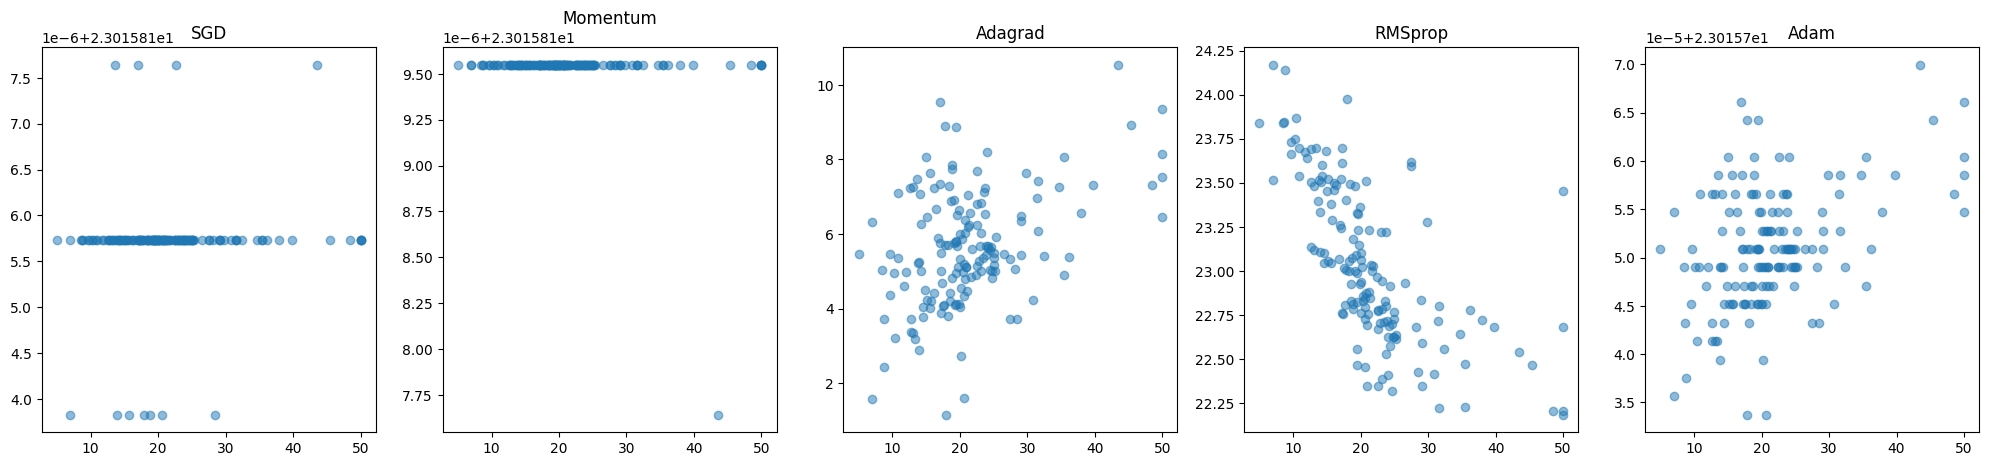

In [23]:
# 모델 학습
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, (optimizer_name, optimizer) in enumerate(optimizers.items()):
    model = nn.Linear(input_dim, output_dim)

    if optimizer_name == "Momentum":
        opt = optimizer(model.parameters(), lr=learning_rate, momentum=0.9)
    else:
        opt = optimizer(model.parameters(), lr=learning_rate)

    # 모델 학습
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
        inputs = torch.tensor(X_train, dtype=torch.float32)
        labels = torch.tensor(y_train, dtype=torch.float32)
        opt.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        opt.step()

        # Print progress
        if (epoch+1) % 100 == 0:
            print(f"{optimizer_name} - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # 모델 예측 및 평가
    with torch.no_grad():
        inputs = torch.tensor(X_test, dtype=torch.float32)
        labels = torch.tensor(y_test, dtype=torch.float32)
        outputs = model(inputs)
        test_loss = criterion(outputs, labels)
        print(f"{optimizer_name} Test Loss: {test_loss.item():.4f}")
        preds = outputs.numpy()

    # 그래프 출력
    axs[i].scatter(y_test, preds, alpha=0.5)
    # axs[i].plot(y_test, y_test, color='red')
    axs[i].set_title(optimizer_name)

plt.show()